In [1]:
import sys
import patchworklib as pw
from plotnine import *
from plotnine.data import *
import plotnine
print(pw.__version__)
print(plotnine.__version__)

0.5.0
0.10.1


<Figure size 100x100 with 0 Axes>

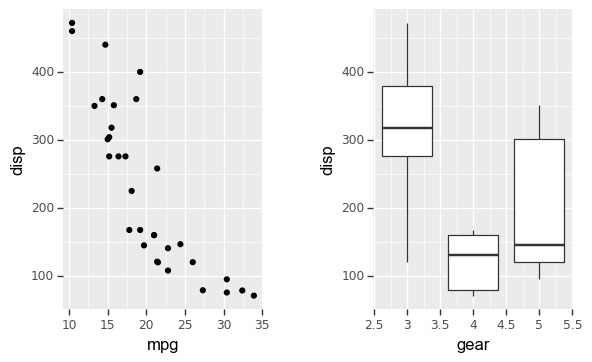

In [2]:
g1 = pw.load_ggplot(ggplot(mtcars) + geom_point(aes("mpg", "disp")),figsize=(2, 3))
g2 = pw.load_ggplot(ggplot(mtcars) + geom_boxplot(aes("gear", "disp", group = "gear")),figsize=(2, 3))
g12 = g1 | g2
g12.savefig()

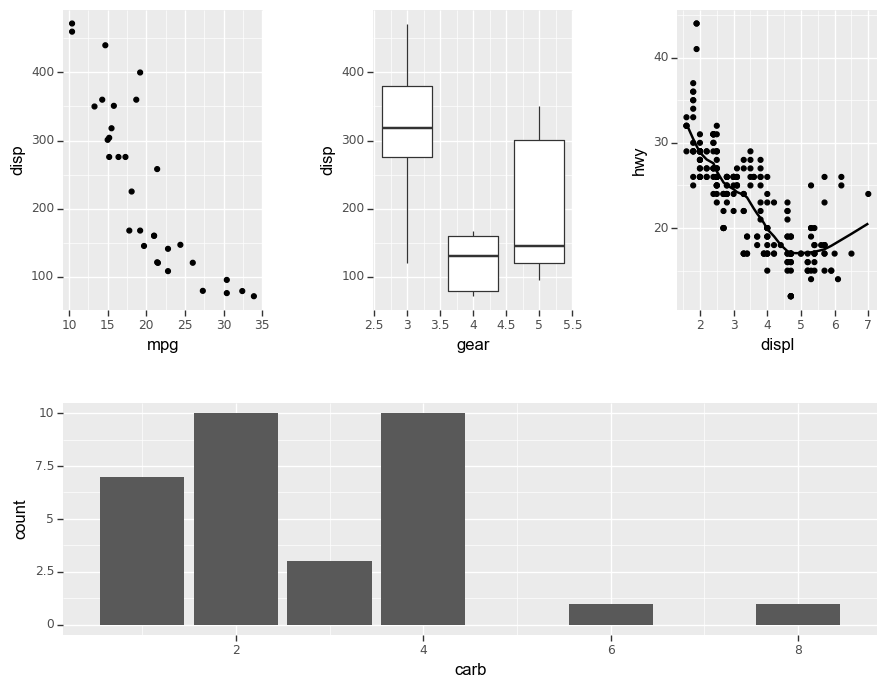

In [3]:
g3 = pw.load_ggplot(ggplot(mpg, aes(x='displ', y='hwy')) + geom_point() + geom_smooth(span=.3) + theme(figure_size=(2, 3)))
g4 = pw.load_ggplot(ggplot(mtcars) + geom_bar(aes("carb")) + theme(figure_size=(7, 2)))
g1234 = (g1|g2|g3)/g4
g1234.savefig()

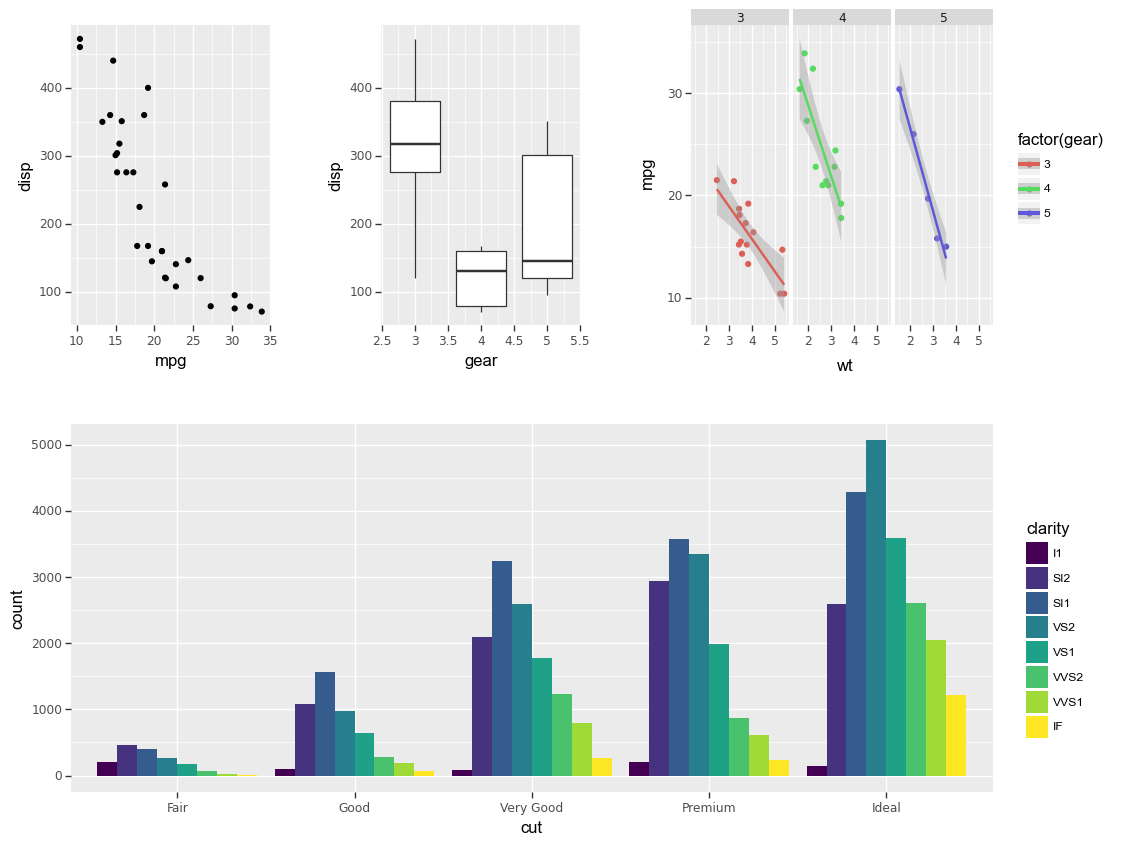

In [4]:
g3 = pw.load_ggplot(ggplot(mtcars, aes('wt', 'mpg', color='factor(gear)')) + geom_point() + stat_smooth(method='lm') + facet_wrap('~gear'), figsize=(3,3))
g4 = pw.load_ggplot(ggplot(data=diamonds) + geom_bar(mapping=aes(x="cut", fill="clarity"), position="dodge"), figsize=(5, 2))
g1234 = (g1|g2|g3)/g4
g1234.savefig()

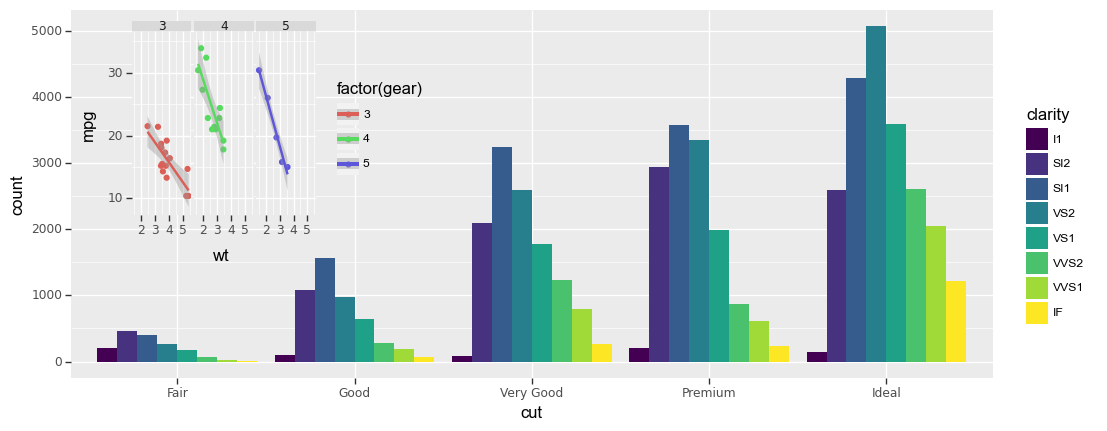

In [5]:
pw.inset(g4,g3,loc="upper left", wratio=0.2, hratio=0.5, hmargin=0.1, vmargin=0.1).savefig()

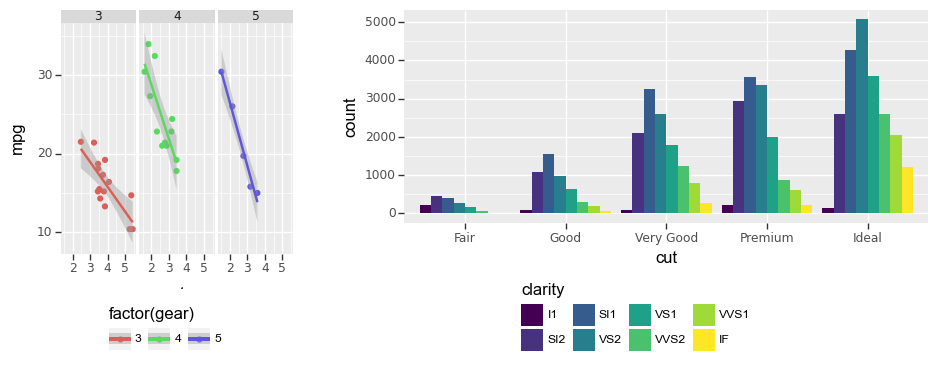

In [6]:
g1 = pw.load_ggplot(ggplot(mtcars, aes('wt', 'mpg', color='factor(gear)')) 
                    + geom_point() + stat_smooth(method='lm')
                    + facet_wrap('~gear')
                    + theme(legend_position=(.5, -0.2), legend_direction='horizontal'),
                    figsize=(3,3))
g2 = pw.load_ggplot(ggplot(data=diamonds) 
                    + geom_bar(mapping=aes(x="cut", fill="clarity"), position="dodge")
                    + theme(legend_position=(.5, -0.2), legend_direction='horizontal'),
                    figsize=(5, 2))
(g1.outline|g2.outline).savefig()

In [7]:
import patchworklib as pw
from plotnine import *
from plotnine.data import *

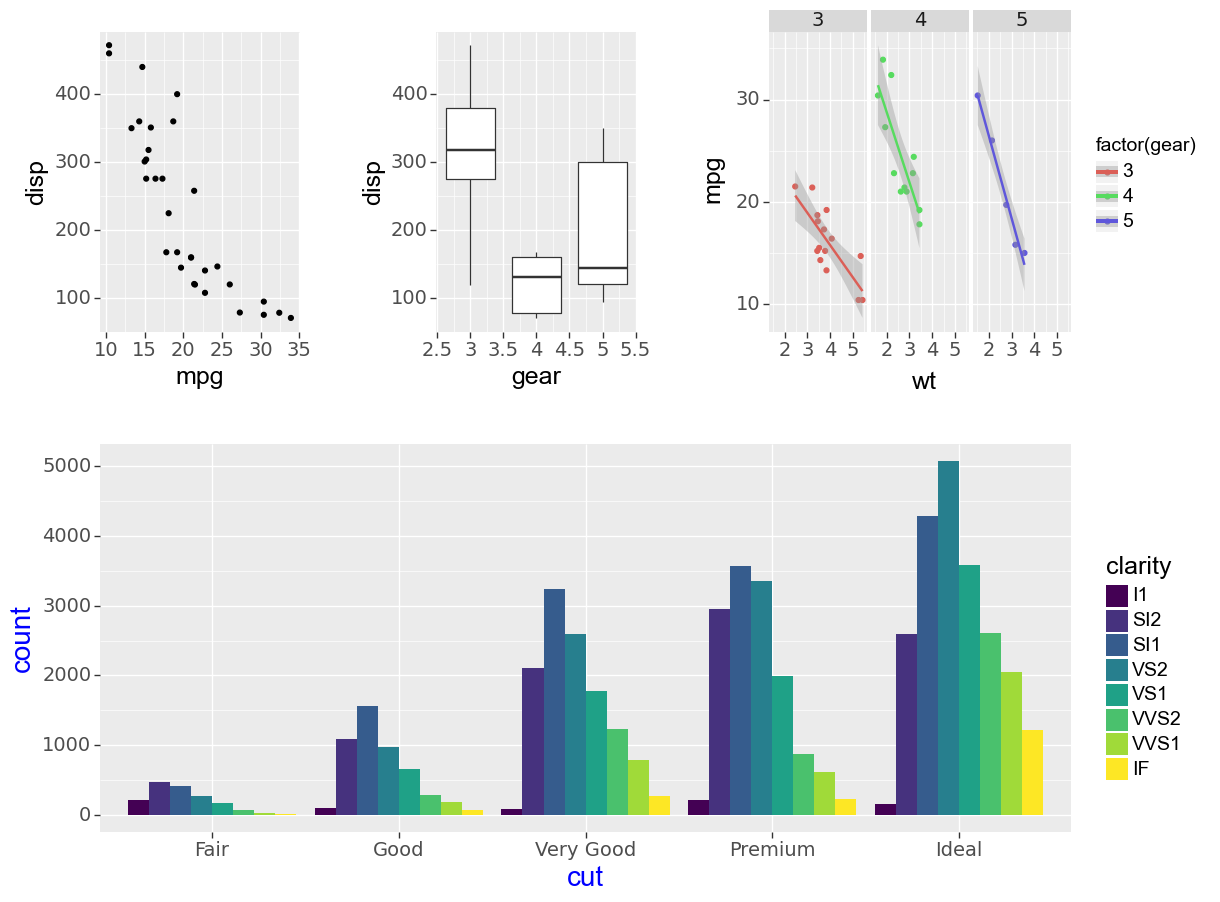

In [8]:
g1 = pw.load_ggplot(ggplot(mtcars) 
                    + geom_point(aes("mpg", "disp"))
                    + theme(text=element_text(size=14), axis_title=element_text(size=18)),
                    figsize=(2,3))
g2 = pw.load_ggplot(ggplot(mtcars) 
                    + geom_boxplot(aes("gear", "disp", group="gear"))
                    + theme(text=element_text(size=14), axis_title=element_text(size=18)), 
                    figsize=(2,3))
g3 = pw.load_ggplot(ggplot(mtcars, aes('wt', 'mpg', color='factor(gear)')) 
                    + geom_point() + stat_smooth(method='lm') 
                    + facet_wrap('~gear')
                    + theme(text=element_text(size=14), axis_title=element_text(size=18)), 
                    figsize=(3,3))
g4 = pw.load_ggplot(ggplot(data=diamonds) 
                    + geom_bar(mapping=aes(x="cut", fill="clarity"), position="dodge")
                    + theme(text=element_text(size=14), axis_title=element_text(size=20, color="blue"), 
                            legend_text=element_text(size=14), legend_title=element_text(size=18)), 
                    figsize=(5,2))
g1234 = (g1|g2|g3)/g4
#g1234 = (g1.outline|g2.outline|g3.outline)/g4.outline
g1234.savefig()

In [9]:
import patchworklib as pw
from plotnine import *
from plotnine.data import *

g1 = pw.load_ggplot(ggplot(mpg, aes(x='cty', color='drv', fill='drv')) + 
                    geom_density(aes(y=after_stat('count')), alpha=0.1) + 
                    scale_color_discrete(guide=False) + 
                    theme(text=element_text(family="Helvetica"),
                          axis_ticks_major_x=element_blank(), 
                          axis_text_x =element_blank(), 
                          axis_title_x=element_blank(),
                          axis_text_y =element_text(size=12),
                          axis_title_y=element_text(size=14),
                          legend_position="none"),
                    figsize=(4,1))

g2 = pw.load_ggplot(ggplot(mpg, aes(x='hwy', color='drv', fill='drv')) + 
                    geom_density(aes(y=after_stat('count')), alpha=0.1) +
                    coord_flip() + 
                    theme(text=element_text(family="Helvetica"),
                          axis_ticks_major_y=element_blank(), 
                          axis_text_y =element_blank(), 
                          axis_title_y=element_blank(),
                          axis_text_x =element_text(size=12),
                          axis_title_x=element_text(size=14)
                         ),
                    figsize=(1,4))

g3 = pw.load_ggplot(ggplot(mpg) + 
                    geom_point(aes(x="cty", y="hwy", color="drv")) + 
                    scale_color_discrete(guide=False) +
                    theme(text=element_text(family="Helvetica"),
                          axis_text =element_text(size=12),
                          axis_title=element_text(size=14)
                         ),
                    figsize=(4,4))

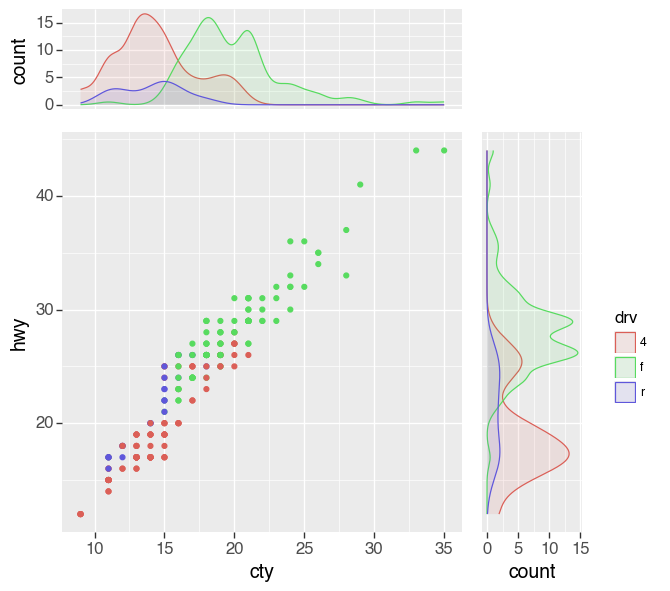

In [10]:
pw.param["margin"] = 0.2
(g1/(g3|g2)[g3]).savefig()

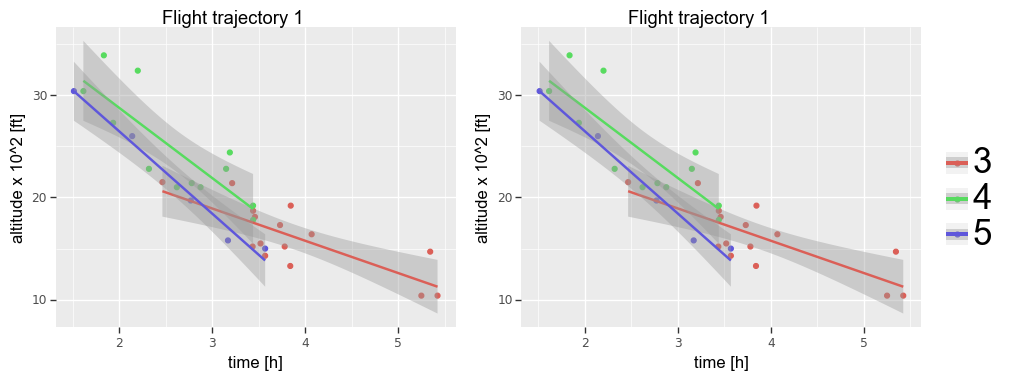

In [11]:
p1 = (
        ggplot(mtcars, aes('wt', 'mpg', color='factor(gear)')) 
        + geom_point() + stat_smooth(method='lm')
        + xlab("time [h]")
        + ylab("altitude x 10^2 [ft]")
        + ggtitle("Flight trajectory "+str(1)+"")
        + theme_gray()
        + theme(
                legend_title=element_blank(),
                figure_size=(12, 9),
                legend_position='none',
                legend_box='horizontal',
        )
)

p2 = (
        ggplot(mtcars, aes('wt', 'mpg', color='factor(gear)')) 
        + geom_point() + stat_smooth(method='lm')
        # + scale_x_datetime(breaks="30 minute", labels=date_format('%H:%M'))
        + xlab("time [h]")
        + ylab("altitude x 10^2 [ft]")
        + ggtitle("Flight trajectory "+str(1)+"")
        + theme_gray()
        + theme(
                legend_title=element_blank(),
                figure_size=(12, 9),
                legend_position='right',
                legend_box='horizontal',
                legend_text=element_text(size=25)
        )
)

p1 = pw.load_ggplot(p1, figsize=(4, 3))
p2 = pw.load_ggplot(p2, figsize=(4, 3))
g1234 = p1|p2
g1234.savefig()

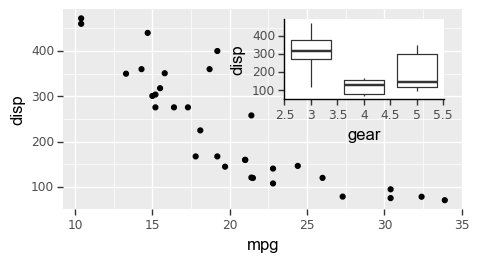

In [12]:
g1  = pw.load_ggplot(ggplot(mtcars) + geom_point(aes("mpg", "disp")),figsize=(4, 2))
g2  = pw.load_ggplot(ggplot(mtcars) + geom_boxplot(aes("gear", "disp", group = "gear")) + theme_classic())
g12 = pw.inset(g1,g2)
g12.savefig("inset_plotnine.png")

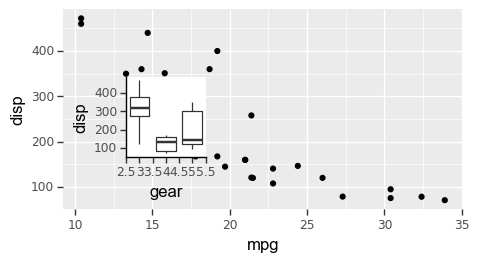

In [13]:
g12 = pw.inset(g1,g2, loc="lower left", hratio=0.4, wratio=0.2)
g12.savefig("inset_plotnine2.png")